In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

# REPLACING THE NULL VALUES TO MEAN OF EACH COLUMN

In [6]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        df[i].fillna(df[i].mean(),inplace=True)

In [7]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# SHOWING OUTLIERS

                    -----------------ph-------------------                 



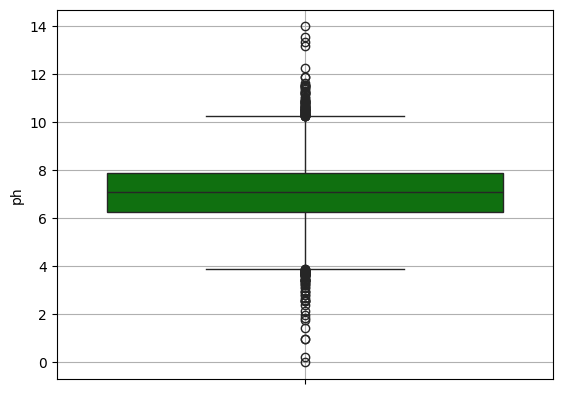

                    -----------------Hardness-------------------                 



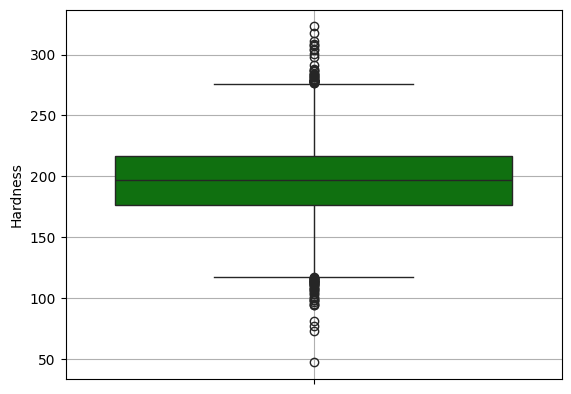

                    -----------------Solids-------------------                 



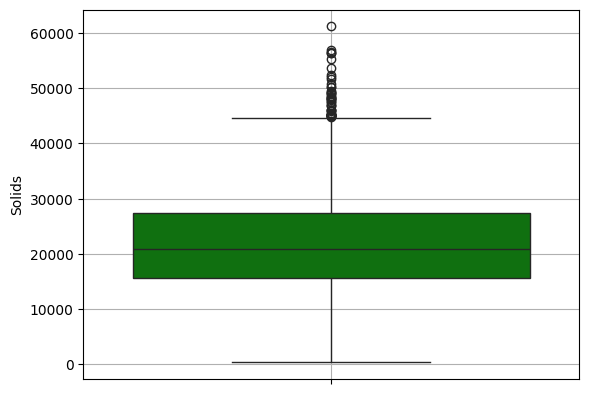

                    -----------------Chloramines-------------------                 



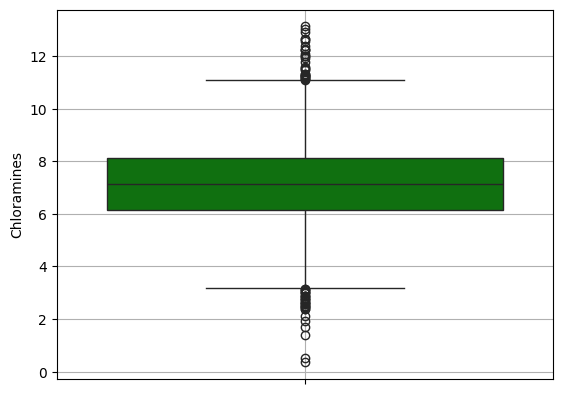

                    -----------------Sulfate-------------------                 



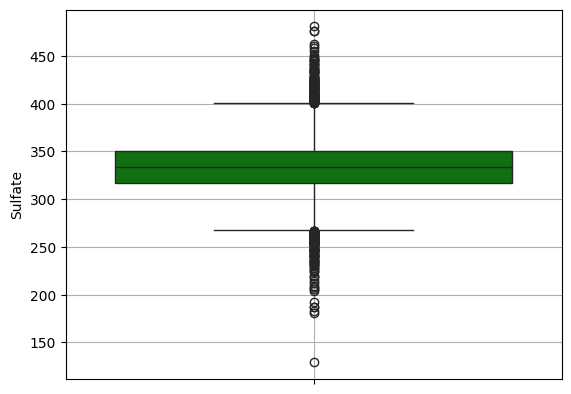

                    -----------------Conductivity-------------------                 



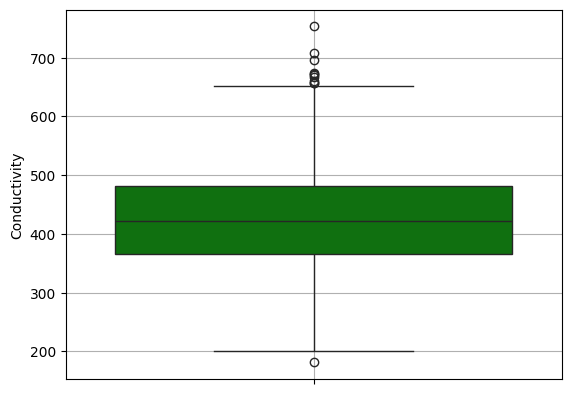

                    -----------------Organic_carbon-------------------                 



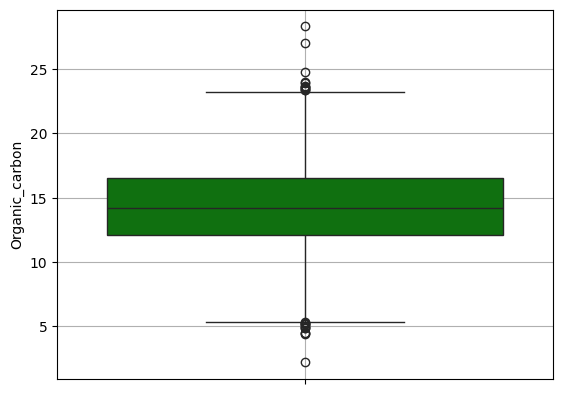

                    -----------------Trihalomethanes-------------------                 



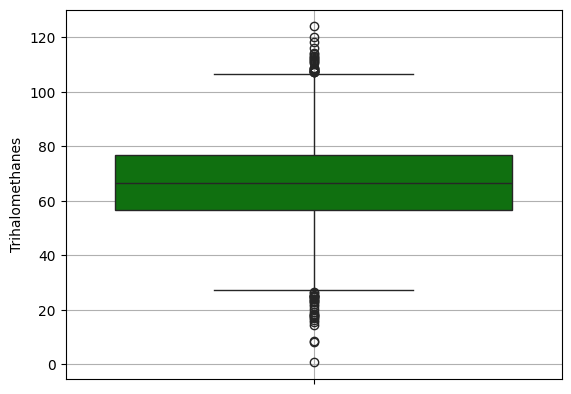

                    -----------------Turbidity-------------------                 



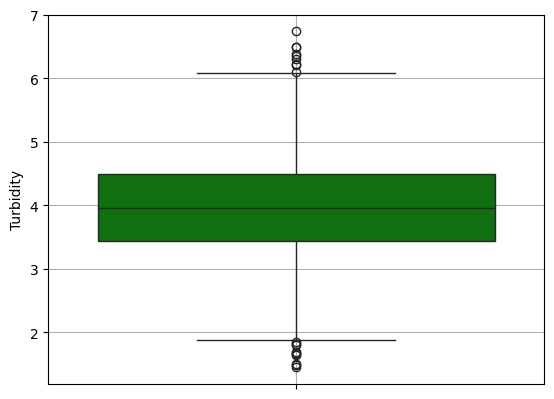

In [8]:
for i in df.columns:
    if i == "Potability":
        pass
    else:
        print(f'                    -----------------{i}-------------------                 \n')
        sns.boxplot(df[i],color='g')
        plt.grid()
        plt.show()

# removing outliers

In [9]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print(f'IQR--------> \n\n{IQR}')

IQR--------> 

ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [10]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print(lower_limit)

ph                    3.889107
Hardness            117.125160
Solids            -1832.417449
Chloramines           3.146221
Sulfate             267.157960
Conductivity        191.647579
Organic_carbon        5.328026
Trihalomethanes      26.619225
Turbidity             1.848797
Potability           -1.500000
dtype: float64


In [11]:
df[((df<lower_limit)|(df>upper_limit)).any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
18,8.975464,279.357167,19460.398131,6.204321,333.775777,431.443990,12.888759,63.821237,2.436086,0
26,3.445062,207.926260,33424.768678,8.782147,384.007006,441.785876,13.805902,30.284597,4.184397,0
32,10.433291,117.791230,22326.892046,8.161505,307.707509,412.986834,12.890709,65.733478,5.057311,0
...,...,...,...,...,...,...,...,...,...,...
3246,10.667364,173.381945,28912.202201,7.071294,276.634391,286.063394,17.685651,55.147364,4.135569,1
3249,10.808157,198.596751,29614.348790,5.782418,304.622061,383.269410,14.902820,47.896406,4.362542,1
3261,3.629922,244.187392,24856.633209,6.618071,366.967873,442.076337,13.302880,59.489294,4.754826,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


# outliers removal

In [12]:
df[~((df<lower_limit)|(df>upper_limit)).any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# checking for collinearity and removing if any

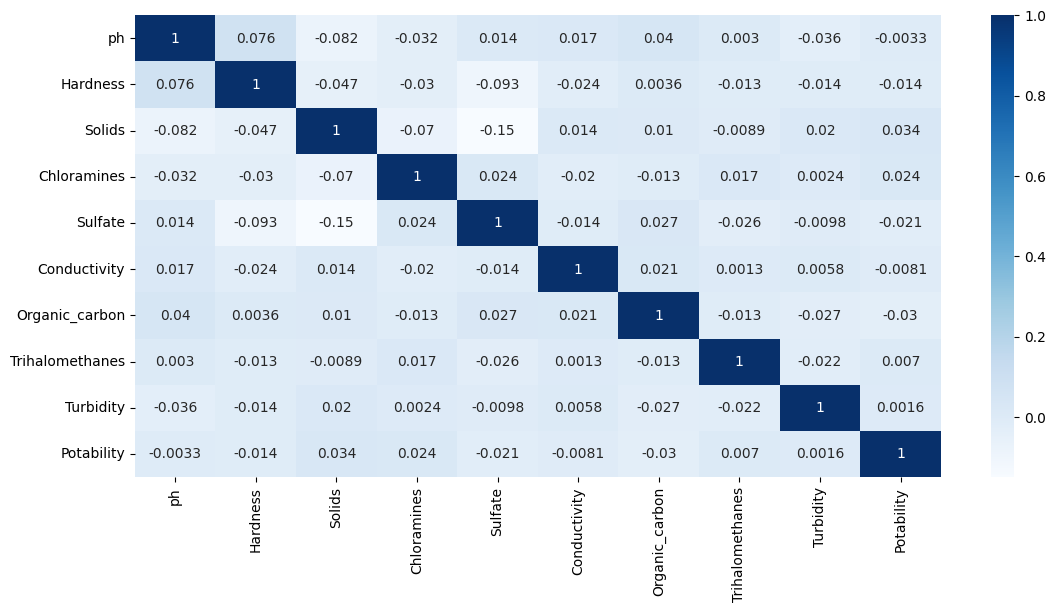

In [21]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

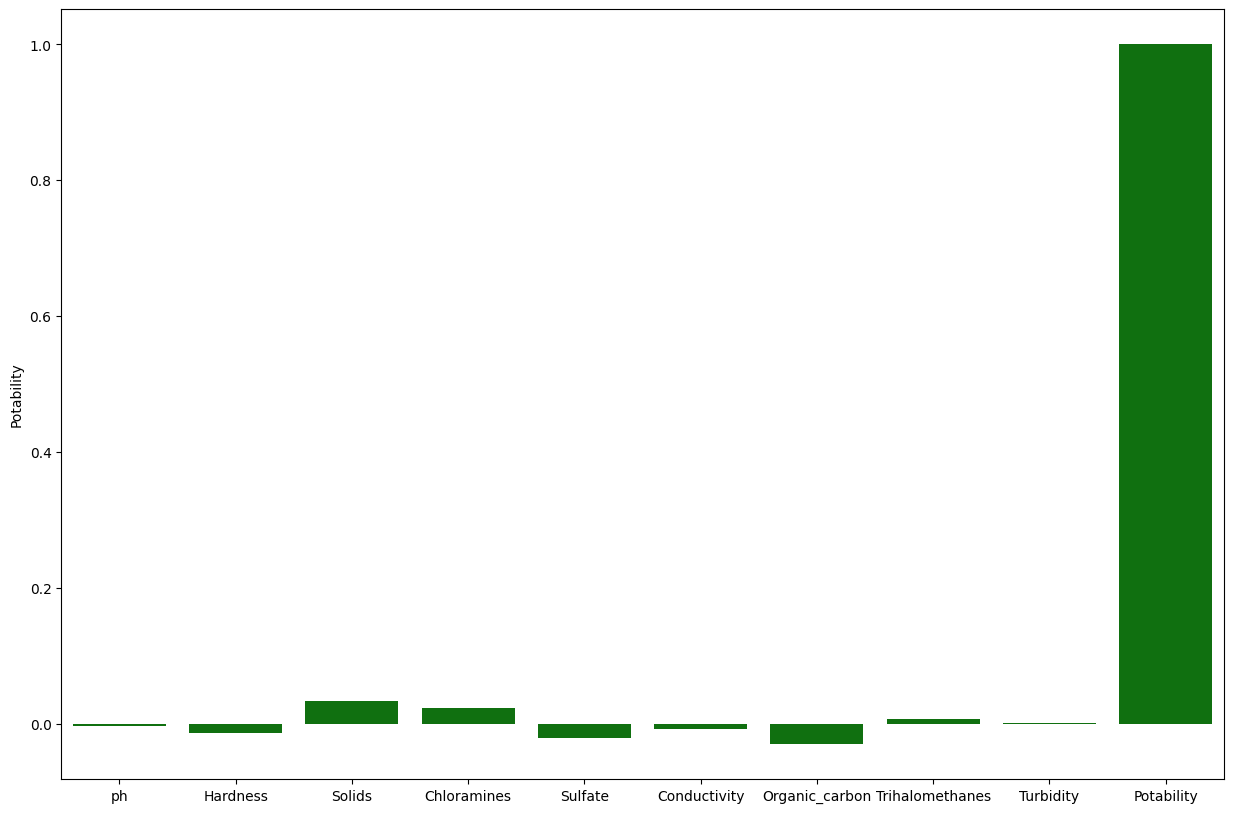

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(df.corr()["Potability"],color='g')
plt.show()

# seperating dependent and independent

In [32]:
x=df.drop(columns='Potability')
y=df['Potability']

# splitting 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [39]:
for i in df.columns:
    print('------max values----------')
    print(f"max value in {i}---->{df[i].max()}\n")
    print('----------min values-----------')
    print(f'min value in {i}----->{df[i].min()}\n')
    

------max values----------
max value in ph---->13.999999999999998

----------min values-----------
min value in ph----->0.0

------max values----------
max value in Hardness---->323.124

----------min values-----------
min value in Hardness----->47.432

------max values----------
max value in Solids---->61227.19600771213

----------min values-----------
min value in Solids----->320.942611274359

------max values----------
max value in Chloramines---->13.127000000000002

----------min values-----------
min value in Chloramines----->0.3520000000000003

------max values----------
max value in Sulfate---->481.0306423059972

----------min values-----------
min value in Sulfate----->129.00000000000003

------max values----------
max value in Conductivity---->753.3426195583046

----------min values-----------
min value in Conductivity----->181.483753985146

------max values----------
max value in Organic_carbon---->28.30000000000001

----------min values-----------
min value in Organic_carbon

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
s=StandardScaler()
X_train_s=s.fit_transform(X_train)
X_test_s=s.fit_transform(X_test)

In [42]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2985,7.080795,188.445469,28791.614416,8.040356,382.009477,422.234861,10.575690,63.235365,3.228379
1073,7.203439,168.445358,22826.484697,6.283250,271.892045,437.370863,16.410654,64.505923,6.389161
3140,7.080795,242.827588,29298.074262,5.853840,340.348645,463.115174,5.426650,66.396293,3.522586
2643,6.056818,211.765886,4440.277357,9.507303,333.775777,316.921776,17.766397,53.541191,3.358061
2174,9.581189,223.296216,28292.780318,5.665431,333.775777,398.479317,11.350768,44.574120,3.929178
...,...,...,...,...,...,...,...,...,...
1095,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959
1130,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,66.396293,4.220028
1294,6.630364,186.761088,30939.023214,7.703481,333.775777,330.876083,13.815757,86.753117,3.490588
860,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137


In [47]:
pd.DataFrame(X_train_s,columns=X_train.columns)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.008982,-0.246998,0.750536,0.587582,1.335674,-0.054682,-1.117452,-0.202345,-0.938934
1,0.074882,-0.856455,0.080096,-0.527665,-1.709476,0.130717,0.656002,-0.122326,3.126131
2,-0.008982,1.410171,0.807459,-0.800215,0.183599,0.446057,-2.682430,-0.003271,-0.560556
3,-0.709177,0.463637,-1.986388,1.518663,0.001836,-1.344653,1.068061,-0.812882,-0.772151
4,1.700785,0.814997,0.694470,-0.919799,0.001836,-0.345662,-0.881878,-1.377626,-0.037641
...,...,...,...,...,...,...,...,...,...
2288,-1.987422,0.360283,-0.034182,-0.805120,-0.172426,-1.986664,-0.917020,-1.244835,0.816045
2289,0.478649,-0.962696,0.381358,0.478209,0.678892,-0.345895,0.317674,-0.003271,0.336420
2290,-0.316987,-0.298326,0.991890,0.373764,0.001836,-1.173728,-0.132680,1.278797,-0.601709
2291,1.155099,0.654608,-0.666520,0.175097,0.009526,-0.461509,0.638941,-1.218485,0.406009


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_s,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
model.score(X_train_s,y_train)

0.7592673353685129

In [58]:
model.score(X_test_s,y_test)

0.6205493387589013

In [60]:
from sklearn.svm import SVC

In [73]:
model_2=SVC(kernel="rbf")
model_2.fit(X_train_s,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [74]:
model_2.score(X_train_s,y_train)

0.7283035324901875

In [75]:
model_2.score(X_test_s,y_test)

0.6958290946083419

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
model_3=LogisticRegression()
model_3.fit(X_train_s,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [80]:
model_3.score(X_train_s,y_train)

0.6022677714784126

In [81]:
model_3.score(X_test_s,y_test)

0.6286876907426246

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
model_4=DecisionTreeClassifier(max_depth=13)
model_4.fit(X_train_s,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,13
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [107]:
model_4.score(X_train_s,y_train)

0.7845617095508068

In [108]:
model_4.score(X_test_s,y_test)

0.6256358087487284

# model selected is model_2

In [109]:
y_pred_train=model_2.predict(X_train_s)
y_pred_test=model_2.predict(X_test_s)

In [121]:
y_train[:5]

2985    0
1073    1
3140    1
2643    0
2174    0
Name: Potability, dtype: int64

In [120]:
y_pred_train[:5]

array([0, 1, 0, 0, 0])

Text(50.722222222222214, 0.5, 'actual')

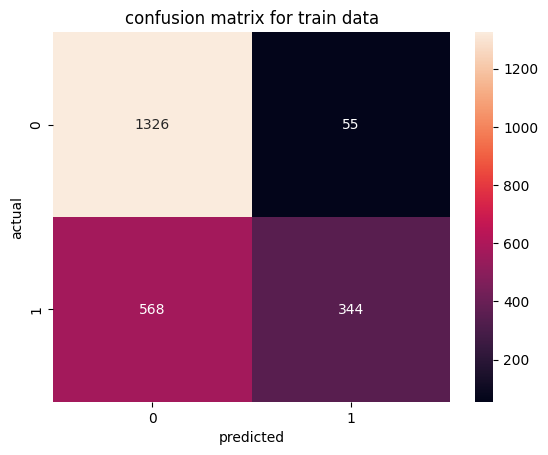

In [143]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt=".4g")
plt.title("confusion matrix for train data")
plt.xlabel("predicted")
plt.ylabel("actual")

Text(50.722222222222214, 0.5, 'actual')

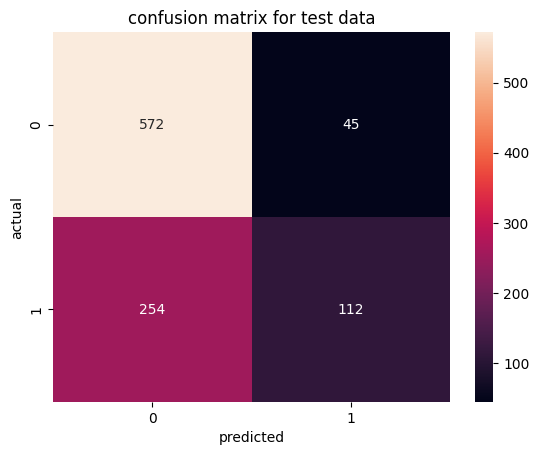

In [144]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt=".4g")
plt.title("confusion matrix for test data")
plt.xlabel("predicted")
plt.ylabel("actual")

In [136]:
print(f'train data accuracy: {round(accuracy_score(y_train,y_pred_train),2)*100}%')

train data accuracy: 73.0%


In [138]:
print(f'test data accuracy: {round(accuracy_score(y_test,y_pred_test),2)*100}%')

test data accuracy: 70.0%


In [140]:
print(f'   train data classification report:- \n\n {classification_report(y_train,y_pred_train)}')

   train data classification report:- 

               precision    recall  f1-score   support

           0       0.70      0.96      0.81      1381
           1       0.86      0.38      0.52       912

    accuracy                           0.73      2293
   macro avg       0.78      0.67      0.67      2293
weighted avg       0.76      0.73      0.70      2293



In [141]:
print(f'   test data classification report:- \n\n {classification_report(y_test,y_pred_test)}')

   test data classification report:- 

               precision    recall  f1-score   support

           0       0.69      0.93      0.79       617
           1       0.71      0.31      0.43       366

    accuracy                           0.70       983
   macro avg       0.70      0.62      0.61       983
weighted avg       0.70      0.70      0.66       983



# sample testing 

In [161]:
x[:1]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.99097,2.963135


In [162]:
data=[[9.0927288,101.133503,18978.98632332,6.523,310.135738,298.41813,18.558279,34.992323,4.075075]]

In [165]:
print(f'predicted potability: {int(model_2.predict(data)[0])}')

predicted potability: 1
